In [36]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numba import jit

In [ ]:
# Função 1

# # Receber imagem
# # colocar bordas 
# # Retorna a imagem com bordas

# Função 2
# # Receber a imagem cinza com bordas 
# # Criar a lista de Kernels
# # retorna a lista de Kernels

# Função 3
# # Receber a lista de Kernels 
# # Gerar de cada kernel um valor de média
# # Colocar cada resultado na nova matriz


In [63]:


# Receber imagem Original
# Mudar para tons de cinza

def image_to_gray(image):
    image_gray = np.zeros((len(image), len(image[0])),dtype=np.uint8)

    for i in range(len(image)):
        for j in range(len(image[0])):
            image_gray[i][j] = (int( image[i][j][0] )+ int(image[i][j][1] )+ int(image[i][j][2] ) )/ len(image[0][0])
    
    return image_gray


# Recebe em tons de cinza
# Colocar Borda na imagem

def zero_box(image, kernel=3):

    var = int((kernel - 1) / 2)
    mask_zeros = np.zeros((len(image) + kernel - 1, len(image[0]) + kernel - 1), dtype=np.uint8) # cria a borda de zeros
    mask_zeros[var:len(image) + var, var:len(image[0]) + var] = image # sobrepoe a imagem sentralizada na matriz

    return mask_zeros


# Recebe a Imagem com as bordas
# Cria a Lista de Kernels

def slice_image(image_in_box, kernel):

    borda = int((kernel-1)/2) 

    input_blur = image_in_box

    var  = kernel - borda

    slice_list = []

    for i in range(len(image_in_box)): #linhas 
        for j in range(len(image_in_box[0])): #colunas

            if (i >= borda and i < (len(image_in_box) -borda))  and ( j >= borda and j < len(image_in_box[0]) -borda):

                slice = image_in_box[i-borda:i+var, j-borda:j+var]

                slice_list.append(slice)
                
    return slice_list

# Recebe a Lista de Kernels
# Gerar a Lista dos cálculos

def calc_slice_averages(slice_list):
    
    results = []
    for i in slice_list:
        average = np.mean(i)
        results.append(average)
    return results

# def calc_slice_const_c(slice_list, c):
    
#     results = []
#     for i in slice_list:
#         average = np.mean(i)-c
#         if input_thresh[i][j]< media_trash:
#                     matriz_suporte[i][j] = 0
#                 else:
#                     matriz_suporte[i][j] = 255
#         results.append(average)
#     return results


# Recebe a Lista de Valores
# Retornar ums nova imagem nas dimensões da original

def build_image(results,image):
    
    blurred_image = np.array(results).reshape(image.shape).astype(np.uint8)
    return blurred_image

# receber imagem em tons de cinza
# retornar imagem limiarizada

def image_threshold(image, limiar):
   
    input_limiar = np.zeros((len(image), len(image[0])),dtype=np.uint8)

    for i in range(len(image)):
        for j in range(len(image[0])):

            aux = image[i][j]
            if aux <= limiar:
                input_limiar[i][j] = 0
            else:
                input_limiar[i][j] = 255
                
    return input_limiar


# def threshoud_adapt(image_in_box, kernel, constante_c):
#     '''
#     entrar com imagem já inserida em uma matriz com bordas 
#     kernel determina a borda da imagem

#     retorna o resultado com as bordas da matriz
#     '''
#     input_thresh = image_in_box
#     matriz_suporte = np.zeros((len(input_thresh), len(input_thresh[0])),dtype=np.uint8)
#     borda = int((kernel-1)/2) 

#     for i in range(len(input_thresh)): #linhas 
#         for j in range(len(input_thresh[0])): #colunas
            
#             if (i >= borda and i < (len(input_thresh) -borda))  and ( j >= borda and j < len(input_thresh[0]) -borda):
#                 media_trash = medias_kernel(kernel,input_thresh,i,j) - constante_c

#                 if input_thresh[i][j]< media_trash:
#                     matriz_suporte[i][j] = 0
#                 else:
#                     matriz_suporte[i][j] = 255

#     threshoud_in_box = matriz_suporte
    
#     return threshoud_in_box


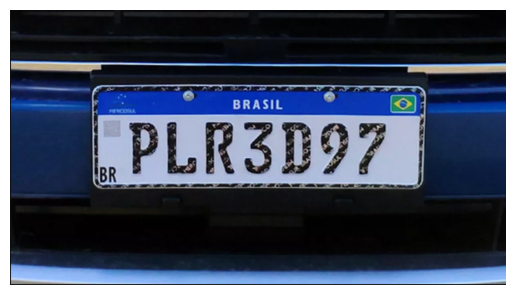

 largura 1083 altura 601  em pixels canais 3 


In [65]:

imagem_placa = cv2.imread('placa_carro1.png')
imagem_placa = cv2.cvtColor(imagem_placa,cv2.COLOR_BGR2RGB)
plt.imshow(imagem_placa)
plt.axis('off')
plt.show()

input = imagem_placa
linhas = len(input)
colunas = len(input[0])
cor = len(input[0][0])
print(' largura {} altura {}  em pixels canais {} ' . format(colunas, linhas, cor))

Blur


In [71]:
k = 3

tonsdecinza = image_to_gray(input)

box = zero_box(tonsdecinza,k)

fatias = slice_image(box,k)

listademediasdaimagem = calc_slice_averages(fatias)

blur_slice = build_image(listademediasdaimagem,tonsdecinza)

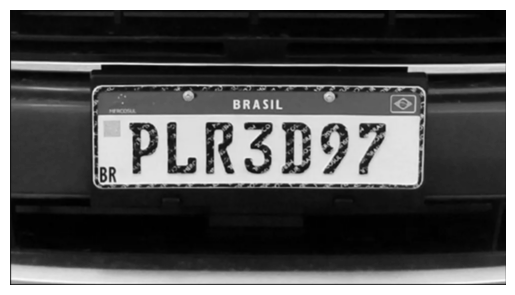

In [73]:

plt.imshow(blur_slice, cmap='gray')
plt.axis('off')
plt.show()

Limiarização

In [74]:
l = 120
limiarized = image_threshold(tonsdecinza,l)

Original


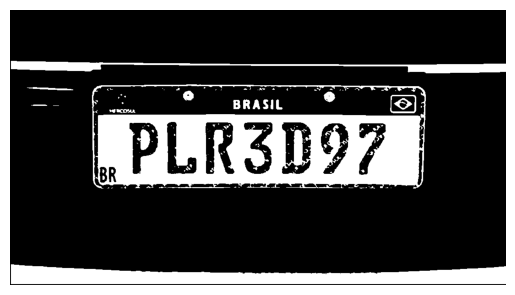

In [75]:
print('Original')
plt.imshow(limiarized, cmap='gray')
plt.axis('off')
plt.show()

Dilatação / Erosão